In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams["figure.figsize"] = (10, 6)
sns.set()

In [2]:
main_data = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
main_data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
702,2014,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38,170
961,2014,SUBARU,TRIBECA AWD,SUV - SMALL,3.6,6,AS5,X,14.7,11.1,13.1,22,301
346,2014,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,E,24.9,19.6,22.5,13,360
1007,2014,TOYOTA,TUNDRA 4WD,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,18.1,13.9,16.2,17,373
335,2014,FIAT,500 CABRIO,MINICOMPACT,1.4,4,M5,X,7.9,6.3,7.2,39,166


### Step 1

In [4]:
# let's first take important feature which are later on use to create a regression model
# let's drop unnecessary variables and make final data frame
final_data = main_data.drop(columns = ["MODELYEAR","MAKE", "FUELTYPE","MODEL", "VEHICLECLASS", "TRANSMISSION"])

# let's create feature variable X and response vector y
X = final_data.drop(columns = ["CO2EMISSIONS"])
y = final_data.CO2EMISSIONS
# let's split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
# here i take 80% data as training data and 20% data as testing data

### Step 2

In [5]:
# let's train our model using linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Step 3

In [6]:
# model testing time
final_predicted = model.predict(X_test)
# here i'm going to test model and check accuracy using MAE, RMSE, MAPE

from sklearn.metrics import mean_absolute_error, mean_squared_error

###### Mean Absolute Error (MAE)
- MAE is the average value of error in a set of predicted values, without considering direction. It ranges from 0 to inf., and lower value means better model. It is the simplest to understand regression error metric

- MAE tells us how big of an error we can expect from the forecast on average.

In [7]:
print("MAE: ", mean_absolute_error(final_predicted, y_test))

MAE:  15.197303826008504


##### Root Mean Square Error (RMSE)
- RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. It ranges from 0 to inf., lower means better model and it is always greater in magnitude than MAE. It is most widely used regression error metric and is mathematically

- RMSE can be interpreted as the standard deviation of the unexplained variance.

In [8]:
print("RMSE:", np.sqrt(mean_squared_error(final_predicted, y_test)))

RMSE: 22.43060430170815


##### Mean Absolute Percentage Error (MAPE)
- MAPE is the average percentage error in a set of predicted values, without considering direction. It ranges from 0 to inf., and lower value means better model.

- It doesn’t depend on the units of data. It is expressed as percentage.

In [9]:
print("MAPE:", np.mean(np.abs((y_test - final_predicted) / y_test)) * 100)

MAPE: 5.578269032477049


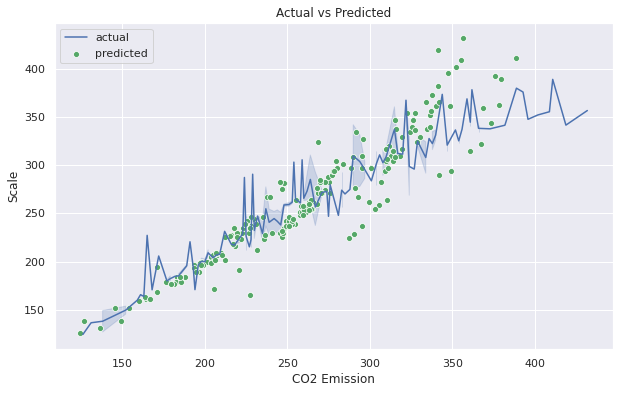

In [10]:
# let's plot predicted value and real value

sns.lineplot(y_test, final_predicted, color = "b", label = "actual")
sns.scatterplot(final_predicted, y_test, color = "g", label = "predicted")
plt.xlabel("CO2 Emission")
plt.ylabel("Scale")
plt.title("Actual vs Predicted")
plt.show()

### Observation of Stage 5:
- Here i selected those features which are highly related to target variable and effect to the target variable, so basically here i choose those features which i found highy co related in stage 4
- Then i have split it into train and test set and here i split 20% for testing and 80% for training data
- Then i create a object of LinearRegression and train a model using training data set
- Then i predicted value using test data set
- Then i evaluted the model using some of evalution technique which are Mean Absolute Error, Root Mean Square Error and Mean Absolute Percentage Error.
- So here as the error rate is minimum our model will performing well
- Then i visualize the actual value and predicted valur of Co2 Emission 